# Compare atmospheric parameters

Compare atmosphreic parameters, the one reconstructed by Spectractor, the other given by MERRA2

-author : Sylvie Dagoret-Campagne


In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
from astropy.io import fits
import numpy as np
import pandas as pd

In [79]:
from astropy.io import fits

In [80]:
from scipy.stats import linregress
from scipy.stats import norm

# Config

In [81]:
#  column 0 : count number
#  column 1 : aerosol value
#  column 2 : pwv value
#  column 3 : ozone value
#  column 6 : data start 
#
index_atm_count=0
index_atm_aer=1
index_atm_pwv=2
index_atm_oz=3
index_atm_ps=4
index_atm_cloud=5
index_atm_data=6

NB_atm_HEADER=6
#NB_atm_DATA=len(WL)-1

# output file

In [82]:
#output_file='MERRA2_2017_M2I1NXASM_M2T1NXAER_M2T1NXRAD_ctio_atmsim.fits'

# input files : data logbook and Merra data

In [83]:
file_merra2='MERRA2_2017_M2I1NXASM_M2T1NXAER_M2T1NXRAD_ctio_AllYear.csv'
file_logbook_ctio='CTIODataJune2017_reduced_RG715_v2_prod3.csv'

## Merra data

In [84]:
df_merra2=pd.read_csv(file_merra2,index_col=0)

In [85]:
df_merra2.index.name='time'
df_merra2.sort_index(inplace=True)

In [86]:
df_merra2.head()

,ps,pwv,ozone,TOTEXTTAU,TOTANGSTR,TOTSCATAU,TAUTOT,TAUHGH,TAUMID,TAULOW
time,,,,,,,,,,
2017-04-30 00:00:00,78636.914062,2.822547,260.352051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30 00:30:00,NaN,NaN,NaN,0.029347,1.307469,0.027696,0.0,0.0,0.0,0.0
2017-04-30 01:00:00,78649.085938,2.668410,261.006653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30 01:30:00,NaN,NaN,NaN,0.028410,1.303434,0.026786,0.0,0.0,0.0,0.0
2017-04-30 02:00:00,78661.726562,2.609197,261.566254,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## CTIO data

In [87]:
#df_ctio=pd.read_csv(file_logbook_ctio,sep=';')
df_ctio=pd.read_csv(file_logbook_ctio)

In [88]:
df_ctio.columns

Index([u'Unnamed: 0', u'date', u'subdir', u'index', u'object', u'filter',
       u'disperser', u'airmass', u'exposure', u'focus', u'seeing', u'P', u'T',
       u'RH', u'W', u'file', u'target', u'targetx', u'targety', u'D2CCD',
       u'pixshift', u'thetafit', u'thetaint', u'A1', u'A2', u'ozone', u'PWV',
       u'VAOD', u'reso', u'D2CCD_fit', u'alpha_fit'],
      dtype='object')

In [89]:
df_ctio=df_ctio.reindex(columns=[
    'date','subdir','index','object','filter','disperser','airmass','exposure','focus','seeing',
    'P','T','RH','W','file','target','targetx','targety','D2CCD','pixshift','thetafit','thetaint',
    'A1','A2','ozone','PWV','VAOD','reso','D2CCD_fit,alpha_fit']).set_index('date').sort_index()

In [90]:
df_ctio.head()

,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,P,...,pixshift,thetafit,thetaint,A1,A2,ozone,PWV,VAOD,reso,"D2CCD_fit,alpha_fit"
date,,,,,,,,,,,,,,,,,,,,,
2017-05-29T04:16:11.205,data_28may17,56,HD185975,dia,HoloAmAg,1.931,30.0,12550.0,1.45,777.0,...,-0.494935,-1.745196,-1.885410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-29T04:18:29.109,data_28may17,57,HD185975,dia,Thor300,1.929,30.0,12550.0,1.45,777.0,...,1.834927,-0.535661,-0.575000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-29T04:19:51.453,data_28may17,58,HD185975,dia,HoloPhP,1.929,30.0,12550.0,1.45,778.0,...,0.000000,-1.052898,-1.021617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-29T04:21:13.848,data_28may17,59,HD185975,dia,HoloPhAg,1.928,30.0,12550.0,1.45,778.0,...,0.000006,-2.250331,-1.784438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-29T04:27:42.796,data_28may17,60,HD185975,dia,Thor300,1.924,30.0,12550.0,1.45,778.0,...,1.445462,-0.476630,-0.575000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df_ctio.tail()

,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,P,...,pixshift,thetafit,thetaint,A1,A2,ozone,PWV,VAOD,reso,"D2CCD_fit,alpha_fit"
date,,,,,,,,,,,,,,,,,,,,,
2017-06-14T07:50:09.848,data_13jun17,95,HD185975,RG715,HoloAmAg,1.849,120.0,12400.0,1.366,-4.0,...,0.000000,-1.174823,-1.663220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-14T07:53:38.102,data_13jun17,96,HD205905,RG715,Thor300,1.027,60.0,12400.0,1.366,-4.0,...,-1.501422,-0.429524,-0.575000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-14T07:55:30.851,data_13jun17,97,HD205905,RG715,HoloPhP,1.025,60.0,12400.0,1.366,-4.0,...,0.000492,-1.027687,-1.042874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-14T07:57:24.265,data_13jun17,98,HD205905,RG715,HoloPhAg,1.023,120.0,12400.0,1.366,-4.0,...,-0.500093,-1.839459,-1.815172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-14T08:00:16.957,data_13jun17,99,HD205905,RG715,HoloAmAg,1.021,120.0,12400.0,1.366,-4.0,...,-0.500464,-1.299105,-1.849246,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Select a night and a disperser in CTIO logbook

- The subdir name is used to get one night
- The disperser == Ron400 

## Select the night

In [92]:
df_ctio_select=df_ctio.loc[df_ctio["subdir"]=="data_30may17"]

In [93]:
df_ctio_select

,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,P,...,pixshift,thetafit,thetaint,A1,A2,ozone,PWV,VAOD,reso,"D2CCD_fit,alpha_fit"
date,,,,,,,,,,,,,,,,,,,,,
2017-05-31T00:00:26.147,data_30may17,57,HD11980,dia,Ron400,1.053,60.0,12450.0,1.140,783.0,...,-1.489776e-02,-0.522891,-0.277000,1.0500,0.06000,166.0,2.00,0.0700,[pix]:,NaN
2017-05-31T00:02:18.596,data_30may17,58,HD11980,dia,Thor300,1.051,60.0,12450.0,0.940,783.0,...,-2.585427e-04,-0.722206,-0.575000,0.9820,0.00060,240.0,2.80,0.0140,[pix]:,NaN
2017-05-31T00:06:14.000,data_30may17,60,HD11980,dia,Ron400,1.047,60.0,12450.0,1.018,783.0,...,1.485377e+00,-0.605152,-0.277000,1.0700,0.00210,365.0,2.00,0.0700,[pix]:,NaN
2017-05-31T00:08:06.454,data_30may17,61,HD11980,dia,Thor300,1.045,60.0,12450.0,0.939,783.0,...,1.004084e+00,-0.757189,-0.575000,0.9860,0.00012,206.0,2.30,0.0080,[pix]:,NaN
2017-05-31T00:09:58.852,data_30may17,62,HD11980,dia,HoloPhP,1.044,60.0,12450.0,0.846,783.0,...,-1.875431e-02,-0.957755,-0.937342,1.2680,0.00005,108.0,2.20,0.0989,[pix]:,NaN
2017-05-31T00:11:51.243,data_30may17,63,HD11980,dia,HoloPhAg,1.042,120.0,12450.0,0.830,783.0,...,4.998810e-01,-1.942219,-1.514865,0.9120,0.00070,119.0,3.60,0.0100,[pix]:,NaN
2017-05-31T00:14:43.647,data_30may17,64,HD11980,dia,HoloAmAg,1.040,120.0,12450.0,0.740,783.0,...,-3.018764e-07,-1.473251,-1.539318,1.0390,0.00060,152.0,5.50,0.0023,[pix]:,NaN
2017-05-31T00:17:36.001,data_30may17,65,HD11980,dia,Ron400,1.037,60.0,12450.0,0.771,783.0,...,2.055313e-01,-0.627491,-0.277000,1.0700,0.00200,337.0,2.10,0.0800,[pix]:,NaN
2017-05-31T00:19:28.503,data_30may17,66,HD11980,dia,Thor300,1.036,60.0,12450.0,0.715,783.0,...,4.517684e-01,-0.750648,-0.575000,0.9820,0.00013,187.0,2.50,0.0090,[pix]:,NaN


In [94]:
len(df_ctio_select)

220

## Select the disperser

In [95]:
df_ctio_select_sel=df_ctio_select[df_ctio_select["disperser"]=="Ron400"]

In [96]:
len(df_ctio_select_sel)

44

In [97]:
df_ctio_select_sel.head()

,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,P,...,pixshift,thetafit,thetaint,A1,A2,ozone,PWV,VAOD,reso,"D2CCD_fit,alpha_fit"
date,,,,,,,,,,,,,,,,,,,,,
2017-05-31T00:00:26.147,data_30may17,57,HD11980,dia,Ron400,1.053,60.0,12450.0,1.140,783.0,...,-0.014898,-0.522891,-0.277,1.050,0.0600,166.0,2.0,0.070,[pix]:,NaN
2017-05-31T00:06:14.000,data_30may17,60,HD11980,dia,Ron400,1.047,60.0,12450.0,1.018,783.0,...,1.485377,-0.605152,-0.277,1.070,0.0021,365.0,2.0,0.070,[pix]:,NaN
2017-05-31T00:17:36.001,data_30may17,65,HD11980,dia,Ron400,1.037,60.0,12450.0,0.771,783.0,...,0.205531,-0.627491,-0.277,1.070,0.0020,337.0,2.1,0.080,[pix]:,NaN
2017-05-31T00:28:58.154,data_30may17,70,HD11980,dia,Ron400,1.030,60.0,12450.0,0.820,783.0,...,0.979187,-0.618319,-0.277,1.070,0.0021,344.0,2.0,0.079,[pix]:,NaN
2017-05-31T00:40:20.202,data_30may17,75,HD11980,dia,Ron400,1.025,60.0,12450.0,0.856,783.0,...,-0.041673,-0.601445,-0.277,1.074,0.0017,331.0,2.0,0.082,[pix]:,NaN


# Find the $time_{start}$ and $time_{stop}$ at CTIO during this night

In [98]:
all_ctio_datetime=pd.to_datetime(df_ctio_select_sel.index.get_values())

In [99]:
ctio_start_time=all_ctio_datetime[0]
ctio_stop_time=all_ctio_datetime[-1]
print 'CTIO :', ctio_start_time,' --> ', ctio_stop_time

CTIO : 2017-05-31 00:00:26.147000  -->  2017-05-31 10:33:46.896000


In [100]:
df_merra2.index.get_values()

array(['2017-04-30 00:00:00', '2017-04-30 00:30:00',
       '2017-04-30 01:00:00', ..., '2017-06-29 22:30:00',
       '2017-06-29 23:00:00', '2017-06-29 23:30:00'], dtype=object)

In [101]:
# convert the string into timestamp
#-------------------------------------
all_datetime=pd.to_datetime(df_merra2.index.get_values())

In [102]:
print len(all_datetime)

2928


In [103]:
idx=0
for timestamp in all_datetime:
    month=timestamp.month
    day=timestamp.days_in_month
    hour=timestamp.hour
    minu=timestamp.minute
    
    # goal take every hours pressure, PWV and Ozone, and average the aerosols and clouds 30 min before and 30 min after
    if minu==0:
        ps=df_merra2.iloc[idx]["ps"]/100. # in hecto-Pa
        pwv=df_merra2.iloc[idx]["pwv"]
        ozone=df_merra2.iloc[idx]["ozone"]
       
        deltat=(all_datetime-timestamp).total_seconds()
        idx_before=np.where(deltat==-1800)[0] # which is the index 1800 seconds before
        idx_after=np.where(deltat==1800)[0]   # which is the index 1800 seconds after
        if idx_before.size==0 and idx_after.size==1:
            aer=df_merra2.iloc[idx_after[0]]["TOTEXTTAU"]
            clouds=df_merra2.iloc[idx_after[0]]["TAUTOT"]
        elif idx_before.size==1 and idx_after.size==0:
            aer=df_merra2.iloc[idx_before[0]]["TOTEXTTAU"] 
            clouds=df_merra2.iloc[idx_before[0]]["TAUTOT"] 
        elif idx_before.size==1 and idx_after.size==1:
            aer=np.mean([df_merra2.iloc[idx_before[0]]["TOTEXTTAU"] ,df_merra2.iloc[idx_after[0]]["TOTEXTTAU"] ])
            clouds=np.mean([df_merra2.iloc[idx_before[0]]["TAUTOT"] ,df_merra2.iloc[idx_after[0]]["TAUTOT"] ])
        else:
            aer=0
            clouds=0
        
        if timestamp >= ctio_start_time and timestamp <= ctio_stop_time:
        
            print 'idx=',idx, ' timestamp=',timestamp,' P=',ps,' pwv=',pwv,' ozone =',ozone
            print ' \t aer=',aer, ' , clouds = ',clouds,' , : index before and after :', idx_before,' ',idx_after, idx_before.size, idx_after.size
        
    idx+=1  # increase the counter

idx= 1490  timestamp= 2017-05-31 01:00:00  P= 788.017734375  pwv= 4.01198816299  ozone = 256.546813965
 	 aer= 0.02672608662395  , clouds =  0.0  , : index before and after : [1489]   [1491] 1 1
idx= 1492  timestamp= 2017-05-31 02:00:00  P= 788.26046875  pwv= 4.18123197556  ozone = 256.972259521
 	 aer= 0.026019286364300002  , clouds =  0.0  , : index before and after : [1491]   [1493] 1 1
idx= 1494  timestamp= 2017-05-31 03:00:00  P= 788.4809375  pwv= 4.564297676090001  ozone = 257.284820557
 	 aer= 0.0255585769191  , clouds =  0.0  , : index before and after : [1493]   [1495] 1 1
idx= 1496  timestamp= 2017-05-31 04:00:00  P= 788.557734375  pwv= 4.83451032639  ozone = 257.99954223599997
 	 aer= 0.0250525437295  , clouds =  0.0  , : index before and after : [1495]   [1497] 1 1
idx= 1498  timestamp= 2017-05-31 05:00:00  P= 788.678984375  pwv= 4.9020113945  ozone = 258.794769287
 	 aer= 0.0245453706011  , clouds =  0.0  , : index before and after : [1497]   [1499] 1 1
idx= 1500  timestam

# Find the corresponding atmospheric parameters in MERRA2

In [104]:
def GetAtmosphericParameters(timestamp0,df_merra2):
    """
    GetAtmosphericParameters(timestamp0,df_merra2) :
     return closest time atmospheric parameters from merra dataset at timestamp0
    
    input arg:
    - timestamp0 : timestamp of the CTIO image in pd.DateTime type
    - df_merra2  : pandas dataset holding all atmospheric parameters indexed by time
    
    where :
    "ps","pwv","ozone" are estimated every hours
    'TOTEXTTAU','TOTANGSTR','TOTSCATAU','TAUTOT','TAUHGH','TAUMID','TAULOW' are estimated ever hour at hour and a half 
    
    then  df_merra2 is split into two datasets in which there are no NA value.
    The estimated value the closest in time are returned
    
    return:
        - ps : presure in hPa from dataset1
        - pwv : Precipitable Water vapour in mm from dataset1
        - ozone : Ozone in Dobson Unit in dataset1 
        - aer   : vertical aerosol optical depth at 550 nm in dataset2
        - clouds : clouds in vertical depth
        - deltat1,deltat2  : time delay wrt timestamp
    
    """
    
    # decode the time form timestamp
    year0=timestamp0.year
    month0=timestamp0.month
    day0=timestamp0.days_in_month
    hour0=timestamp0.hour
    minu0=timestamp0.minute
    
    # remove NA in rows and split in 2 datasets, dataset1,dataset2 without NA 
    # datset1 with ps, pwv ozone 
    dataset1_m2=df_merra2.dropna(axis=0,how='all',subset=["ps","pwv","ozone"]).loc[:, 'ps':'ozone']
    # datset2 with aerosols and clouds
    dataset2_m2=df_merra2.dropna(axis=0,how='all',subset=['TOTEXTTAU','TOTANGSTR','TOTSCATAU','TAUTOT','TAUHGH','TAUMID','TAULOW']).loc[:,'TOTEXTTAU':'TAULOW']
    
    
    # convert the string into timestamp
    #-------------------------------------
    all_datetime1_m2=pd.to_datetime(dataset1_m2.index.get_values())
    all_datetime2_m2=pd.to_datetime(dataset2_m2.index.get_values())
    
   
    # get time difference between timestamp = timestamp-merra2-timestamp-ctio
    #---------------------------------------
    deltat1=(all_datetime1_m2-timestamp0).total_seconds()
    deltat2=(all_datetime2_m2-timestamp0).total_seconds()
    
    delays1=np.abs(deltat1)
    idx1=np.where(delays1==delays1.min())[0][0]
    
    delays2=np.abs(deltat2)
    idx2=np.where(delays2==delays2.min())[0][0]
    
    if False:
        print 'deltat1 :' ,deltat1[idx1], pd.Timedelta(deltat1[idx1],unit='s')
        print dataset1_m2.iloc[idx1,:]
        
        print 'deltat2 :' ,deltat2[idx2],pd.Timedelta(deltat2[idx2],unit='s')
        print dataset2_m2.iloc[idx2,:]
        
    ps=dataset1_m2.iloc[idx1]["ps"]/100. # convert Pa into hecto-Pa
    pwv=dataset1_m2.iloc[idx1]["pwv"]
    ozone=dataset1_m2.iloc[idx1]["ozone"]
    aer=dataset2_m2.iloc[idx2]["TOTEXTTAU"]
    clouds=dataset2_m2.iloc[idx2]["TAUTOT"]
    
    if False:
        print 'idx1=',idx1,' P=',ps,' pwv=',pwv,' ozone =',ozone
        print 'idx2=',idx2,' aer=',aer, ' , clouds = ',clouds
    
    return ps,pwv,ozone,aer,clouds,deltat1[idx1]/60.,deltat2[idx2]/60.                          

## loop on selected CTIO date to find Merra2 atmospheric parameters

In [105]:
merra2_ps=[]
merra2_pwv=[]
merra2_ozone=[]
merra2_aer=[]
merra2_clouds=[]

for thectiodate in all_ctio_datetime:
    ps,pwv,ozone,aer,clouds,deltat1,deltat2=GetAtmosphericParameters(thectiodate,df_merra2)
    merra2_ps.append(ps)
    merra2_pwv.append(pwv)
    merra2_ozone.append(ozone)
    merra2_aer.append(aer)
    merra2_clouds.append(clouds)

In [106]:
merra2_ps=np.array(merra2_ps)
merra2_pwv=np.array(merra2_pwv)
merra2_ozone=np.array(merra2_ozone)
merra2_aer=np.array(merra2_aer)
merra2_clouds=np.array(merra2_clouds)

# Build the augmented CTIO logbook for that night

In [107]:
df_ctio_new=df_ctio_select_sel

In [108]:
df_ctio_new["m2_ps"]=merra2_ps
df_ctio_new["m2_pwv"]=merra2_pwv
df_ctio_new["m2_ozone"]=merra2_ozone
df_ctio_new["m2_aer"]=merra2_aer
df_ctio_new["m2_clouds"]=merra2_clouds

/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [109]:
df_ctio_new.head()

,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,P,...,ozone,PWV,VAOD,reso,"D2CCD_fit,alpha_fit",m2_ps,m2_pwv,m2_ozone,m2_aer,m2_clouds
date,,,,,,,,,,,,,,,,,,,,,
2017-05-31T00:00:26.147,data_30may17,57,HD11980,dia,Ron400,1.053,60.0,12450.0,1.140,783.0,...,166.0,2.0,0.070,[pix]:,NaN,787.765391,4.134839,255.870422,0.027201,0.0
2017-05-31T00:06:14.000,data_30may17,60,HD11980,dia,Ron400,1.047,60.0,12450.0,1.018,783.0,...,365.0,2.0,0.070,[pix]:,NaN,787.765391,4.134839,255.870422,0.027201,0.0
2017-05-31T00:17:36.001,data_30may17,65,HD11980,dia,Ron400,1.037,60.0,12450.0,0.771,783.0,...,337.0,2.1,0.080,[pix]:,NaN,787.765391,4.134839,255.870422,0.027201,0.0
2017-05-31T00:28:58.154,data_30may17,70,HD11980,dia,Ron400,1.030,60.0,12450.0,0.820,783.0,...,344.0,2.0,0.079,[pix]:,NaN,787.765391,4.134839,255.870422,0.027201,0.0
2017-05-31T00:40:20.202,data_30may17,75,HD11980,dia,Ron400,1.025,60.0,12450.0,0.856,783.0,...,331.0,2.0,0.082,[pix]:,NaN,788.017734,4.011988,256.546814,0.027201,0.0


# Do the analysis

In [110]:
def StudyCorrelation(df,var1,var2,title,xtitle,ytitle):
    theX=df[var1].values
    theY=df[var2].values
    
    slope,intercept,rvalue,pvalue,stderr=linregress(theX,theY)
    nbsig=norm.ppf(1-pvalue)
    
    statinfo="r={:4.3f}, pvalue = {:3.2g}, $\sigma$ = {:2.1f}".format(rvalue,pvalue,nbsig)
    
    fulltitle=title+statinfo
    
    theZ,theCov=np.polyfit(theX,theY,1,cov=True)
    pol = np.poly1d(theZ)
    Xfit=np.linspace(theX.min(),theX.max(),50)
    Yfit=pol(Xfit)
    
    
    ax=df.plot.scatter(x=var1,y=var2,c='DarkBlue',grid=True,title=fulltitle,figsize=(10, 6),fontsize = 16)
    ax.plot(Xfit,Yfit,'r-')
    ax.set(xlabel=xtitle, ylabel=ytitle)
    plt.show()
    
    corr=df.corr()
    print corr
    
    plt.figure(figsize=(4, 3))
    plt.imshow(corr, cmap='bwr', interpolation='none', aspect='auto',vmin=-1,vmax=+1)
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns);
    plt.suptitle('Correlation Matrix ', fontsize=15, fontweight='bold')
    plt.show()
    

## Pressure

In [111]:
df_ps=df_ctio_new[["P","m2_ps"]]

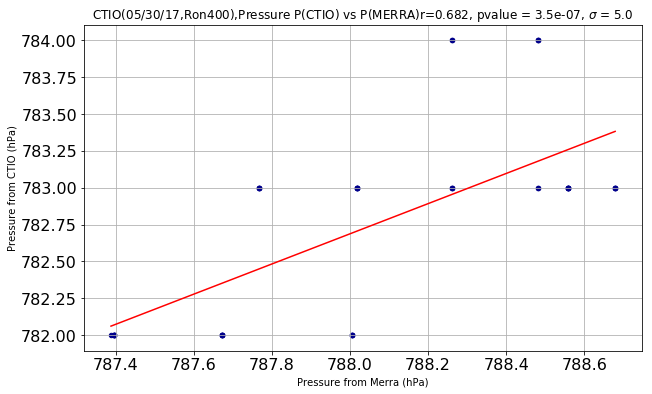

              P     m2_ps
P      1.000000  0.681804
m2_ps  0.681804  1.000000


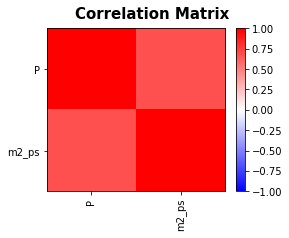

In [112]:
StudyCorrelation(df_ps,"m2_ps","P","CTIO(05/30/17,Ron400),Pressure P(CTIO) vs P(MERRA)","Pressure from Merra (hPa)","Pressure from CTIO (hPa)")

## PWV

In [113]:
df_pwv=df_ctio_new[["PWV","m2_pwv"]]

In [114]:
df_pwv.head()

,PWV,m2_pwv
date,,
2017-05-31T00:00:26.147,2.0,4.134839
2017-05-31T00:06:14.000,2.0,4.134839
2017-05-31T00:17:36.001,2.1,4.134839
2017-05-31T00:28:58.154,2.0,4.134839
2017-05-31T00:40:20.202,2.0,4.011988


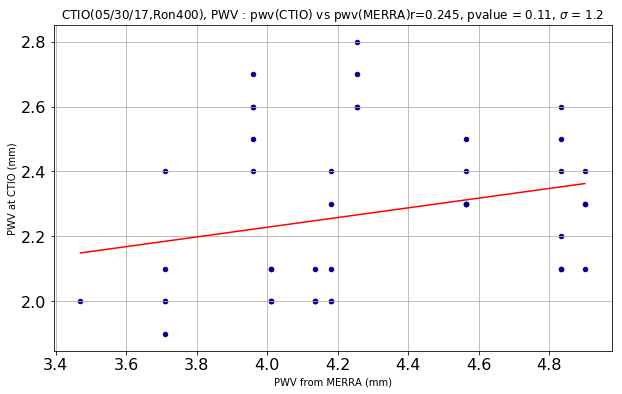

             PWV    m2_pwv
PWV     1.000000  0.244819
m2_pwv  0.244819  1.000000


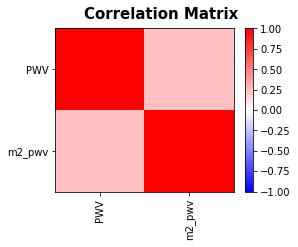

In [115]:
StudyCorrelation(df_pwv,"m2_pwv","PWV","CTIO(05/30/17,Ron400), PWV : pwv(CTIO) vs pwv(MERRA)","PWV from MERRA (mm)","PWV at CTIO (mm)")

## Ozone

In [116]:
df_ozone=df_ctio_new[["ozone","m2_ozone"]]

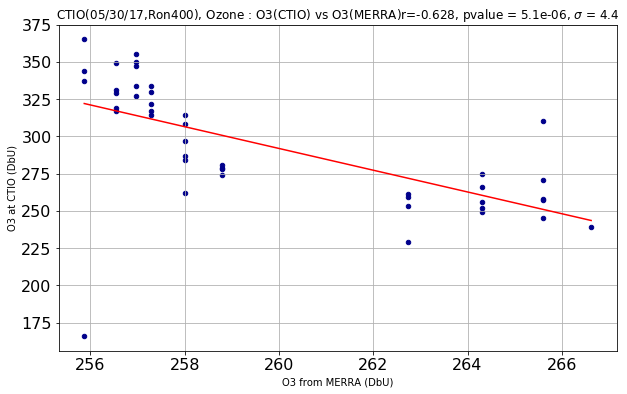

             ozone  m2_ozone
ozone     1.000000 -0.627753
m2_ozone -0.627753  1.000000


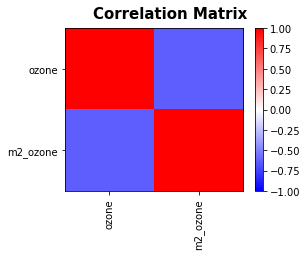

In [117]:
StudyCorrelation(df_ozone,"m2_ozone","ozone","CTIO(05/30/17,Ron400), Ozone : O3(CTIO) vs O3(MERRA)","O3 from MERRA (DbU)","O3 at CTIO (DbU)")

## VAOD

In [118]:
df_aer=df_ctio_new[["VAOD","m2_aer"]]

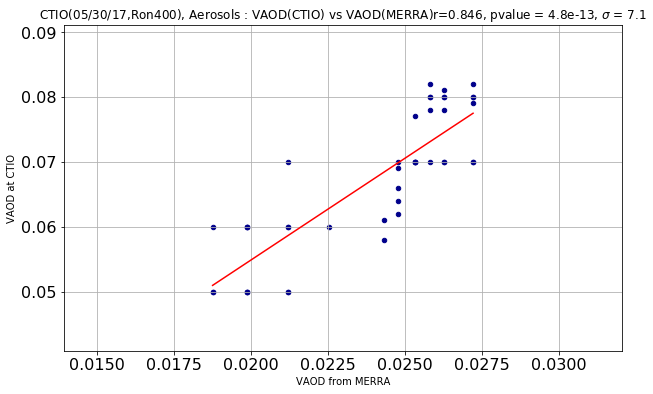

            VAOD    m2_aer
VAOD    1.000000  0.846037
m2_aer  0.846037  1.000000


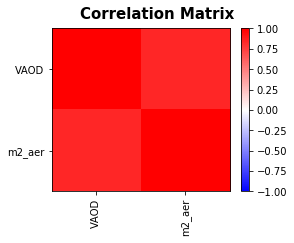

In [119]:
StudyCorrelation(df_aer,"m2_aer","VAOD","CTIO(05/30/17,Ron400), Aerosols : VAOD(CTIO) vs VAOD(MERRA)","VAOD from MERRA","VAOD at CTIO")